In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:

# Voltage divider #1

R1 = 100 # ohms unless otherwise stated
R2 = 20E3
C1 = 680E-12 # farads

# Voltage divider #2

R3 = 47E3 # ohms unless otherwise stated
C2 = 0.22E-6 # farads

# Voltage divider #3

R4 = 200 # ohms unless otherwise stated
R5 = 2E3
C3 = 1E-9 # farads

measured_params = (R1, R2, R3, R4, R5, C1, C2, C3)

j = 0 + 1j

def gain50(frequency, R1, R2, R3, R4, R5, C1, C2, C3):
    omega = 2 * np.pi * frequency
    amp1 = ((1 / (1 / R2 + (j * omega * C1))) + R1) / R1
    amp2 = ((j * omega * C2) + R3) / R3
    amp3 = ((1 / (1 / R5 + (j * omega * C3))) + R4) / R4
    return np.abs(((amp1 * amp3) / amp2))


/home/jupyter/309 workspace/309-Pool/notebooks


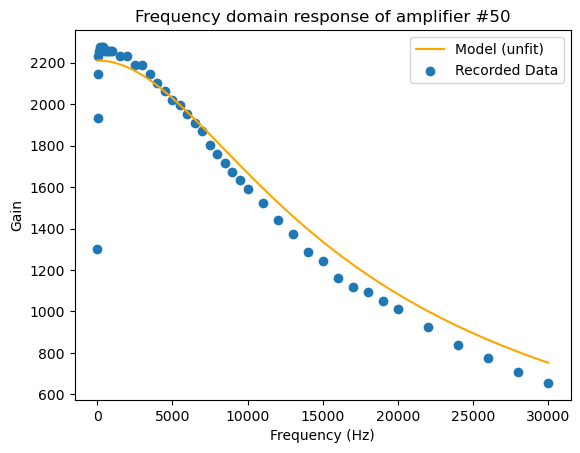

In [18]:
frequency_domain = np.linspace(25, 30000, 300)
fig, ax = plt.subplots()
import os

print(os.getcwd())
# os.chdir("/home/jupyter/309 workspace/309-Pool/scripts/")
data = np.loadtxt("../data_manual/freq_char-amp50.csv", delimiter=",", skiprows=1)
ax.plot(frequency_domain, np.abs(gain50(frequency_domain, *measured_params)), label="Model (unfit)", c="orange")
ax.scatter(data[:,0], data[:,4], label="Recorded Data")
ax.set_title("Frequency domain response of amplifier #50")
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Gain")
ax.legend()

In [16]:
foo = 2
foo = foo + 3
print(foo)
gain50(np.array([1, 2, 3]), *measured_params)

5


array([2210.99998147-0.21325137j, 2210.99992588-0.42650274j,
       2210.99983324-0.63975408j])

Attempting to brute-force fit this model

In [22]:
from scipy.optimize import curve_fit

params, ncov = curve_fit(gain50, data[:,0], data[:,4], p0=measured_params)
print(params)
print(measured_params)

[ 3.06535183e+01  3.94611478e+04 -6.69163640e+10  4.05859366e+02
  2.83390872e+02  2.74026996e-10 -7.28047543e-01  3.81654680e-08]
(100, 20000.0, 47000.0, 200, 2000.0, 6.8e-10, 2.2e-07, 1e-09)
